<a href="https://colab.research.google.com/github/rafaelameriele/Python/blob/https%2Fcolab.research.google.com%2Fdrive%2F1wM4LbbJ-St5R7L8S1c_Y4WFvbeqHu4Mm%23scrollTo%3DwNDwedAgX3AW/An%C3%A1lise_de_Dados_Unidade_III.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Análise de Dados - Unidade III**

###Aluna: Rafaela Meriele Coelho Silva
###Matrícula: 20170007870


# **Introdução**

O presente relatório tem o objetivo de analisar de maneira exploratória, em um panorama geral, os homícidios ocorridos nos Estados Unidos durante os anos de 1980 a 2014.

Dessa forma, veremos o sexo das vítimas, os anos de ocorrência, status de resolução do crime, tipos de arma utilizadas e a relação entre o agressor e a vítima.

> A base de dados utilizada está disponível em: (https://www.kaggle.com/datasets/murderaccountability/homicide-reports?resource=download&select=database.csv)







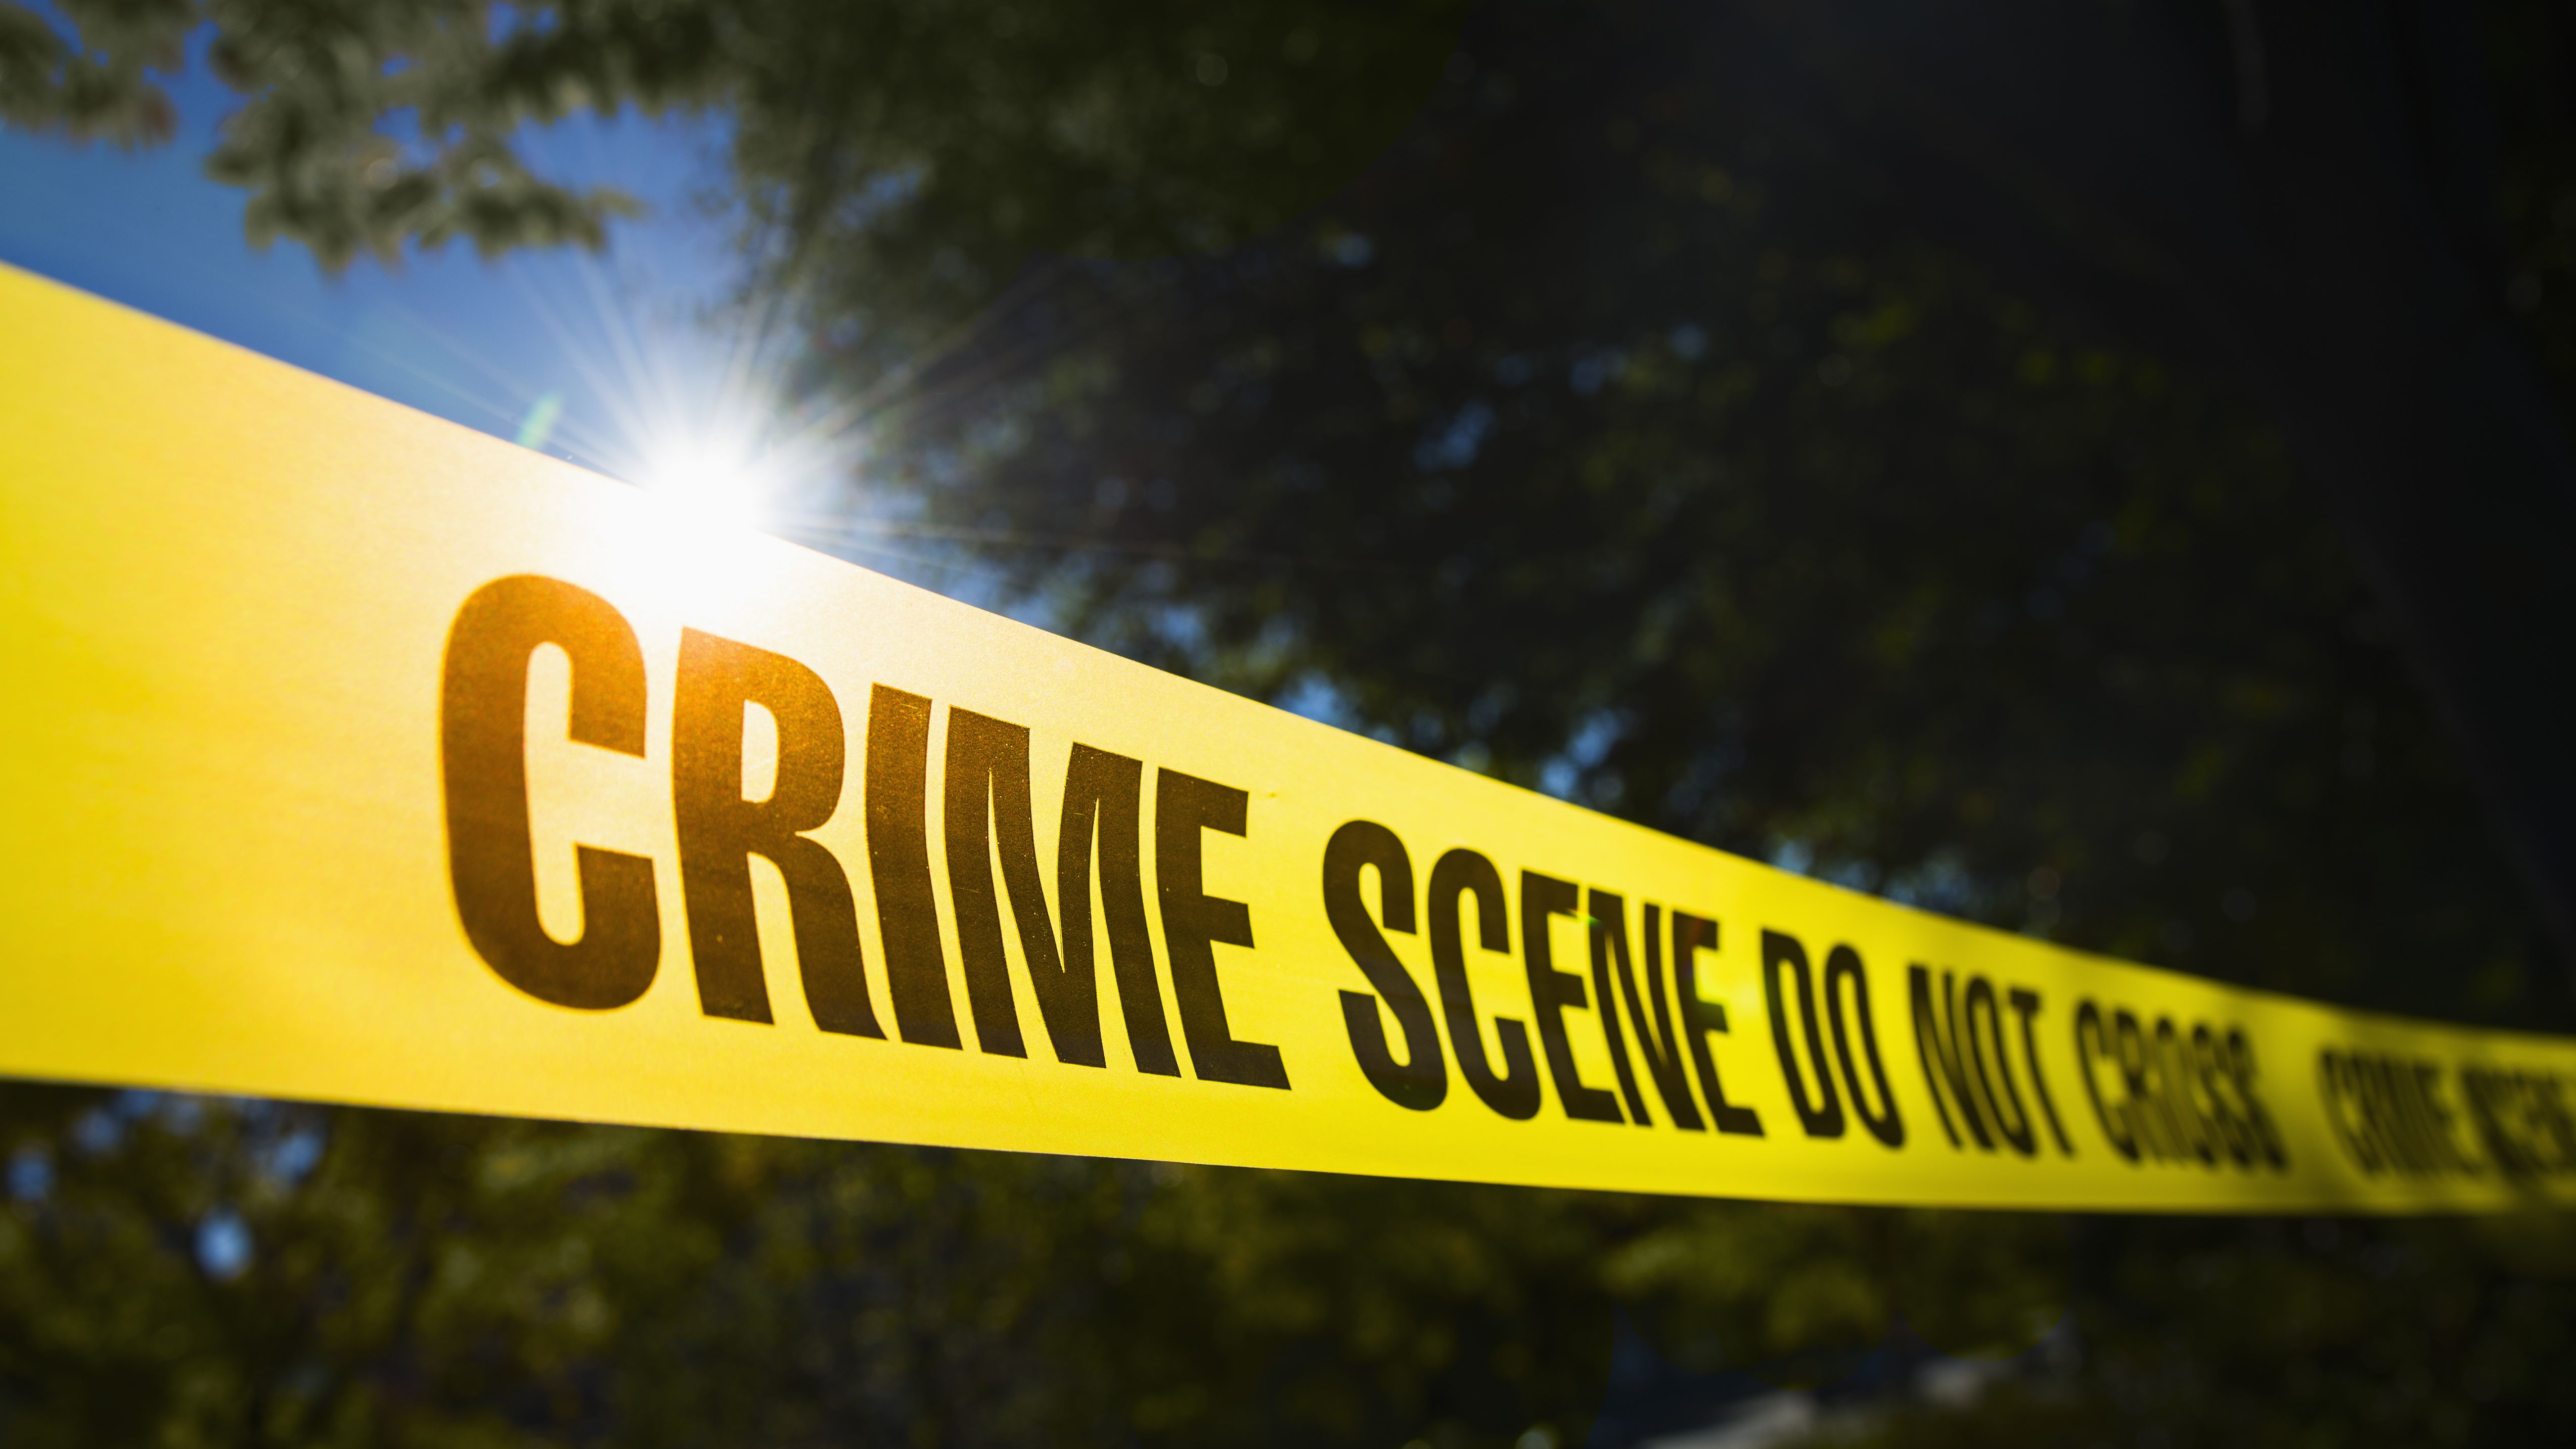

In [82]:
#Importando bibliotecas

import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 

In [83]:
#Ler arquivo

dados = pd.read_csv('database.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [84]:
#Verificando o início dos dados

dados.head()

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI


In [85]:
#Verificando o final dos dados

dados.tail()

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
638449,638450,WY01500,Park County,Sheriff,Park,Wyoming,2014,January,1,Murder or Manslaughter,...,Hispanic,Unknown,0,Unknown,Unknown,Unknown,Handgun,0,0,FBI
638450,638451,WY01700,Sheridan County,Sheriff,Sheridan,Wyoming,2014,June,1,Murder or Manslaughter,...,Unknown,Male,57,White,Unknown,Acquaintance,Handgun,0,0,FBI
638451,638452,WY01701,Sheridan,Municipal Police,Sheridan,Wyoming,2014,September,1,Murder or Manslaughter,...,Unknown,Female,22,Asian/Pacific Islander,Unknown,Daughter,Suffocation,0,0,FBI
638452,638453,WY01800,Sublette County,Sheriff,Sublette,Wyoming,2014,December,1,Murder or Manslaughter,...,Not Hispanic,Male,31,White,Not Hispanic,Stranger,Knife,0,1,FBI
638453,638454,WY01902,Rock Springs,Municipal Police,Sweetwater,Wyoming,2014,September,1,Murder or Manslaughter,...,Not Hispanic,Female,24,White,Not Hispanic,Daughter,Blunt Object,0,1,FBI


In [86]:
#Verificando informações dos dados

dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638454 entries, 0 to 638453
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Record ID              638454 non-null  int64 
 1   Agency Code            638454 non-null  object
 2   Agency Name            638454 non-null  object
 3   Agency Type            638454 non-null  object
 4   City                   638454 non-null  object
 5   State                  638454 non-null  object
 6   Year                   638454 non-null  int64 
 7   Month                  638454 non-null  object
 8   Incident               638454 non-null  int64 
 9   Crime Type             638454 non-null  object
 10  Crime Solved           638454 non-null  object
 11  Victim Sex             638454 non-null  object
 12  Victim Age             638454 non-null  int64 
 13  Victim Race            638454 non-null  object
 14  Victim Ethnicity       638454 non-null  object
 15  

#**Limpeza de Dados**

Nesta etapa será realizada a limpeza dos dados, com o objetivo de deixar o banco de dados mais enxuto para a análise a ser realizada.

In [87]:
#Verificando se há duplicidade

sum(dados.duplicated()) 

0

In [88]:
#Retirando colunas que não serão necessárias

murder = dados.drop(['Agency Name','Agency Type', 'Victim Count', 'Perpetrator Count','Record Source'], axis=1)
murder

,Record ID,Agency Code,City,State,Year,Month,Incident,Crime Type,Crime Solved,Victim Sex,Victim Age,Victim Race,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon
0,1,AK00101,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,Yes,Male,14,Native American/Alaska Native,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object
1,2,AK00101,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation
2,3,AK00101,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown
3,4,AK00101,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation
4,5,AK00101,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638449,638450,WY01500,Park,Wyoming,2014,January,1,Murder or Manslaughter,No,Male,30,White,Hispanic,Unknown,0,Unknown,Unknown,Unknown,Handgun
638450,638451,WY01700,Sheridan,Wyoming,2014,June,1,Murder or Manslaughter,Yes,Male,62,White,Unknown,Male,57,White,Unknown,Acquaintance,Handgun
638451,638452,WY01701,Sheridan,Wyoming,2014,September,1,Murder or Manslaughter,Yes,Female,0,Asian/Pacific Islander,Unknown,Female,22,Asian/Pacific Islander,Unknown,Daughter,Suffocation
638452,638453,WY01800,Sublette,Wyoming,2014,December,1,Murder or Manslaughter,Yes,Male,55,White,Not Hispanic,Male,31,White,Not Hispanic,Stranger,Knife


#**Análise de Dados**

Nesta etapa iniciaremos a análise de dados.

In [89]:
#Estatísticas dos dados

murder.describe().T

,count,mean,std,min,25%,50%,75%,max
Record ID,638454.0,319227.500000,184305.938720,1.0,159614.25,319227.5,478840.75,638454.0
Year,638454.0,1995.801102,9.927693,1980.0,1987.00,1995.0,2004.00,2014.0
Incident,638454.0,22.967924,92.149821,0.0,1.00,2.0,10.00,999.0
Victim Age,638454.0,35.033512,41.628306,0.0,22.00,30.0,42.00,998.0


A amostra possui um grande número de observações, totalizando em 638.454. 

Visto que a coluna 'year' identifica os anos em que ocorreram os homicídios, a média é justamente o ano que está em 50% (3º quartil), os valores de mínimo e máximo são justamente os anos que estão sendo observados (menor e maior).

Incidente é a quantidade de incidentes por estado. Então podemos observar que a média de incidentes por estado é de 22.

A idade média das vítimas deste banco de dados é de 35 anos. É possível notar uma anomalia na idade máxima, onde está com '998', o que não é possível, dessa forma, será excluído.

In [90]:
#Iniciando processo de exclusão através de filtro que retira idades acima de 998

filtro = murder[murder['Victim Age'] < 998]
filtro

,Record ID,Agency Code,City,State,Year,Month,Incident,Crime Type,Crime Solved,Victim Sex,Victim Age,Victim Race,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon
0,1,AK00101,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,Yes,Male,14,Native American/Alaska Native,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object
1,2,AK00101,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation
2,3,AK00101,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown
3,4,AK00101,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation
4,5,AK00101,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638449,638450,WY01500,Park,Wyoming,2014,January,1,Murder or Manslaughter,No,Male,30,White,Hispanic,Unknown,0,Unknown,Unknown,Unknown,Handgun
638450,638451,WY01700,Sheridan,Wyoming,2014,June,1,Murder or Manslaughter,Yes,Male,62,White,Unknown,Male,57,White,Unknown,Acquaintance,Handgun
638451,638452,WY01701,Sheridan,Wyoming,2014,September,1,Murder or Manslaughter,Yes,Female,0,Asian/Pacific Islander,Unknown,Female,22,Asian/Pacific Islander,Unknown,Daughter,Suffocation
638452,638453,WY01800,Sublette,Wyoming,2014,December,1,Murder or Manslaughter,Yes,Male,55,White,Not Hispanic,Male,31,White,Not Hispanic,Stranger,Knife


In [91]:
filtro.describe().T

,count,mean,std,min,25%,50%,75%,max
Record ID,637480.0,319114.850631,184279.143474,1.0,159530.75,319054.5,478707.25,638454.0
Year,637480.0,1995.795070,9.925990,1980.0,1987.00,1995.0,2004.00,2014.0
Incident,637480.0,22.988102,92.213585,0.0,1.00,2.0,10.00,999.0
Victim Age,637480.0,33.562204,17.792594,0.0,22.00,30.0,42.00,99.0


Dessa forma, agora temos como idade máxima: 99 anos.
Com isso, a média de idade das vítimas passa a ser 33 anos.

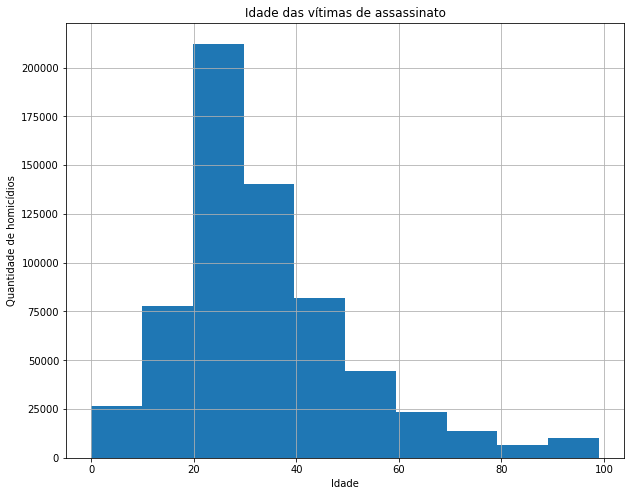

In [92]:
#Idade das vítimas

filtro['Victim Age'].hist(figsize = (10,8));
plt.title('Idade das vítimas de assassinato')
plt.ylabel('Quantidade de homicídios')
plt.xlabel('Idade')
plt.show()

A maior parte das vítimas está entre 20 e 40 anos de idade.

In [93]:
filtro.count()

Record ID                637480
Agency Code              637480
City                     637480
State                    637480
Year                     637480
Month                    637480
Incident                 637480
Crime Type               637480
Crime Solved             637480
Victim Sex               637480
Victim Age               637480
Victim Race              637480
Victim Ethnicity         637480
Perpetrator Sex          637480
Perpetrator Age          637480
Perpetrator Race         637480
Perpetrator Ethnicity    637480
Relationship             637480
Weapon                   637480
dtype: int64

In [94]:
#Quantidade de vítimas por sexo

filtro['Victim Sex'].value_counts()

Male       493944
Female     143272
Unknown       264
Name: Victim Sex, dtype: int64

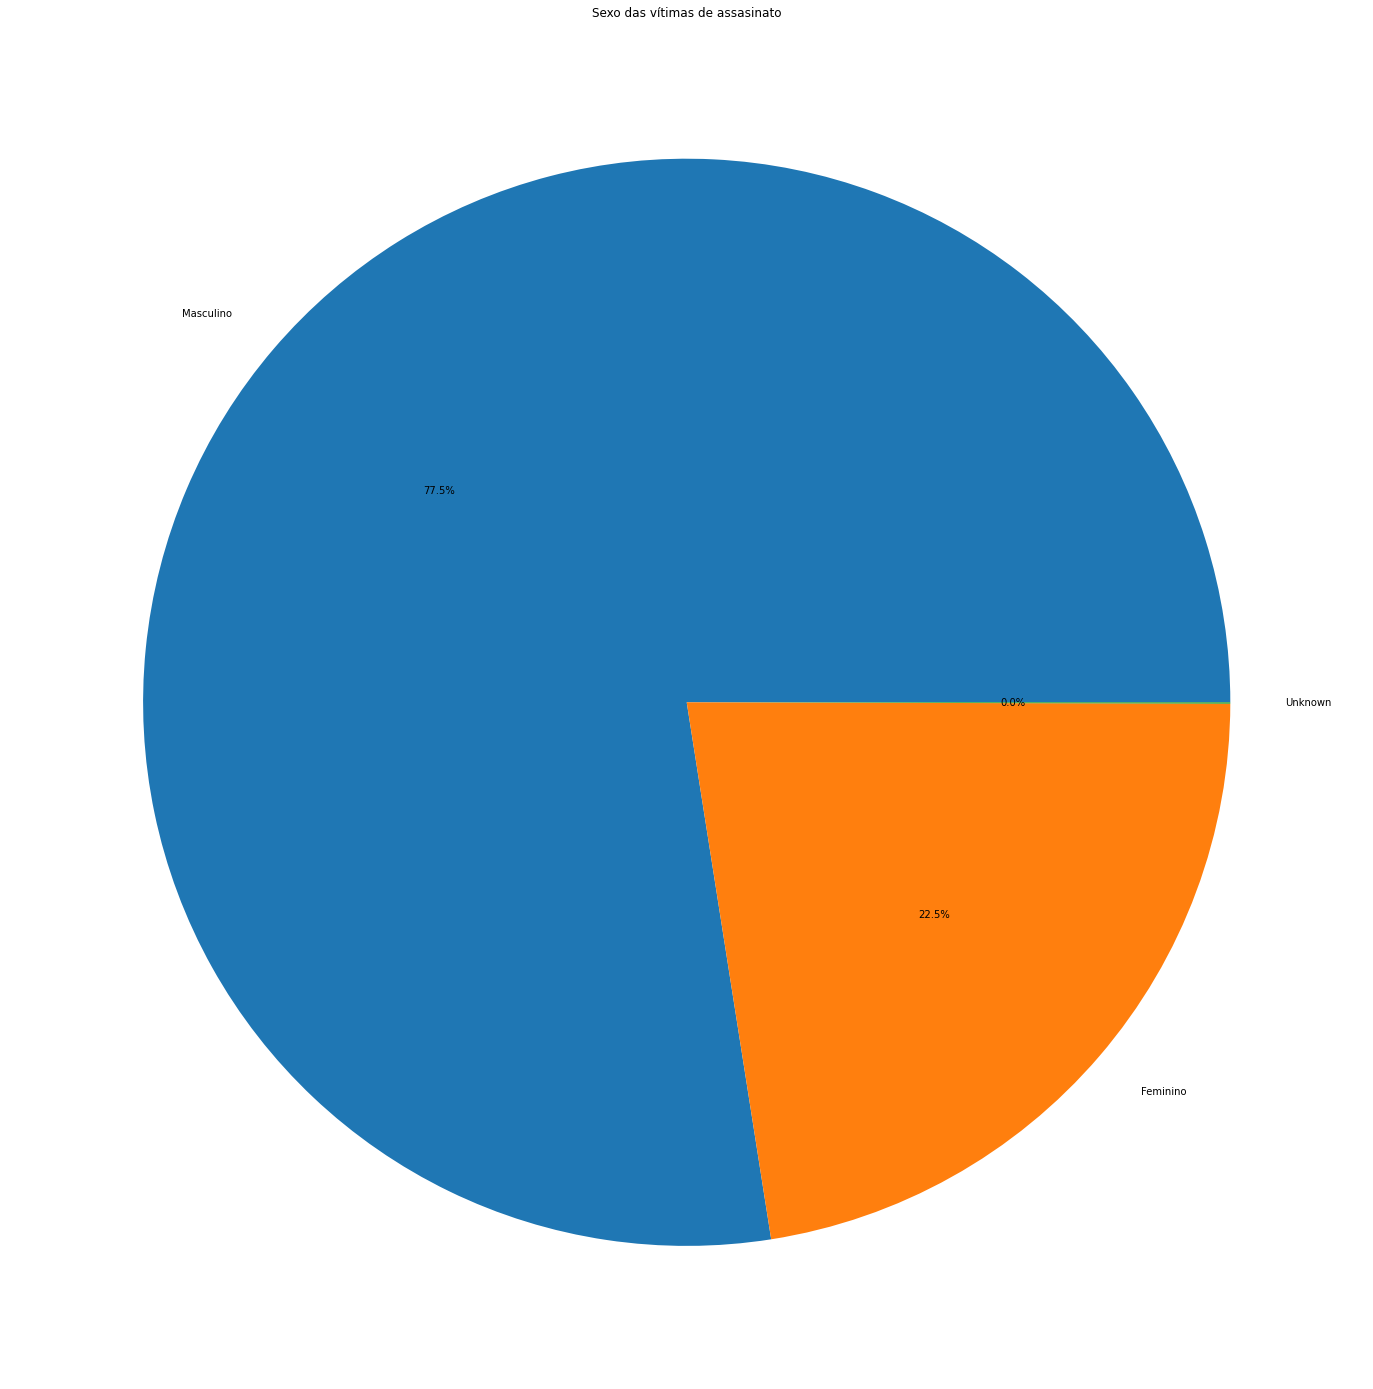

In [95]:
sexovitima = filtro['Victim Sex'].value_counts(normalize=True)
rotulo = ['Masculino', "Feminino", 'Unknown']
plt.pie(sexovitima,labels = rotulo, autopct='%1.1f%%')
plt.title('Sexo das vítimas de assasinato')
plt.show()

Nota-se que os homens morreram mais do que as mulheres. Além disso, 264 pessoas não tiveram sexo identificado.

In [96]:
#Verificando o tipo de crime

filtro['Crime Type'].value_counts()

Murder or Manslaughter        628372
Manslaughter by Negligence      9108
Name: Crime Type, dtype: int64

A maior quantidade de óbitos foi homícidio por assassinato, enquanto a menor parte se refere a homícidio por negligência (provavelmente médica).

In [97]:
filtro['Crime Solved'].value_counts()

Yes    447803
No     189677
Name: Crime Solved, dtype: int64

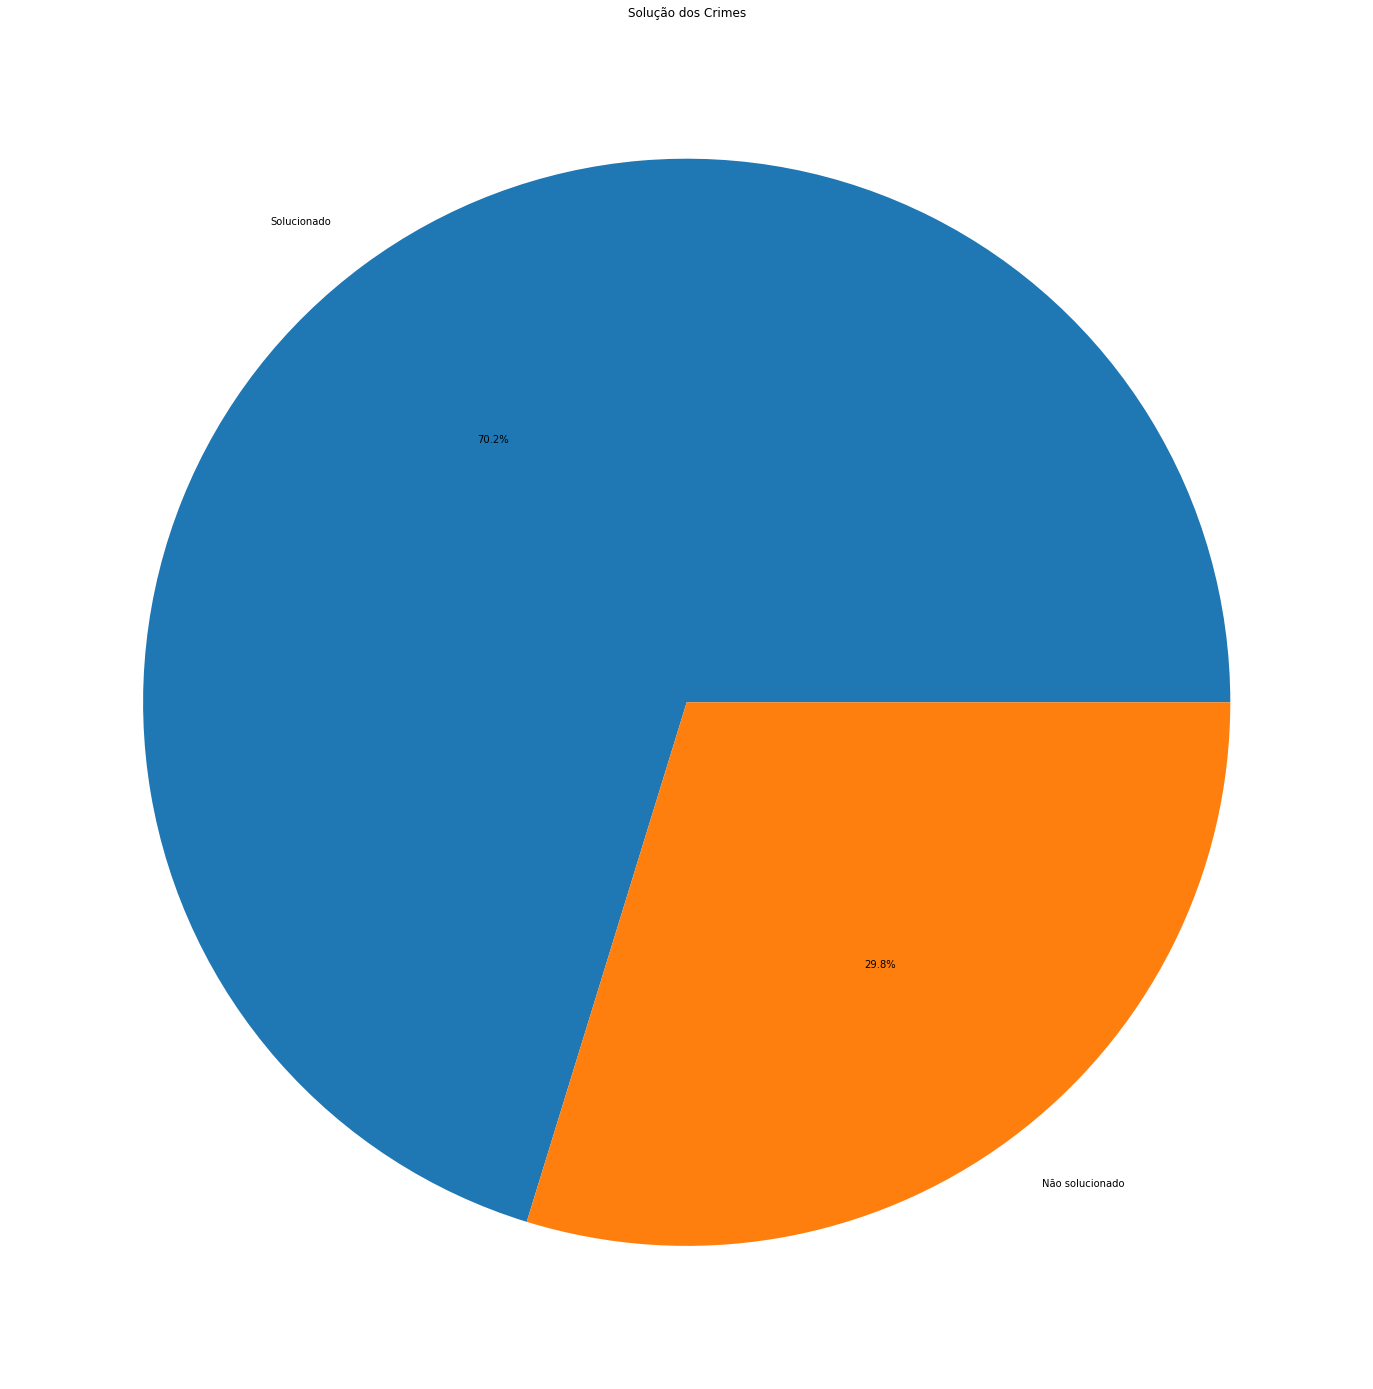

In [98]:
crimesolved = filtro['Crime Solved'].value_counts(normalize=True)
rotulo = ['Solucionado','Não solucionado']
plt.pie(crimesolved,labels = rotulo, autopct='%1.1f%%')
plt.title('Solução dos Crimes')
plt.show()

De todos os crimes, temos que 447.803 (70,2%) foram solucionados, ou seja, teve assassino da vítima revelado. Enquanto 189.677 (29,8%) crimes não foram solucionados, ou seja, o assassino não foi encontrado.

In [99]:
anodocrime = filtro['Year'].value_counts()
anodocrime

1993    24305
1992    23766
1994    23224
1980    23078
1991    22629
1990    21231
1981    21189
1995    21148
1982    20531
1986    20099
1989    19864
1983    19635
1996    18929
1987    18767
1988    18761
1985    18367
1984    18058
1997    17757
2007    17273
2006    17248
2005    16816
2003    16497
2002    16248
2004    16206
1998    15990
2009    15828
2001    15783
2008    15566
2010    15105
2012    14920
2011    14745
2000    14645
1999    14603
2013    14445
2014    14224
Name: Year, dtype: int64

In [100]:
#Verificando tipos de arma do crime

filtro['Weapon'].value_counts()

Handgun          317286
Knife             94897
Blunt Object      67245
Firearm           46863
Unknown           32769
Shotgun           30707
Rifle             23336
Strangulation      8105
Fire               6149
Suffocation        3963
Gun                2197
Drugs              1581
Drowning           1203
Explosives          537
Poison              453
Fall                189
Name: Weapon, dtype: int64

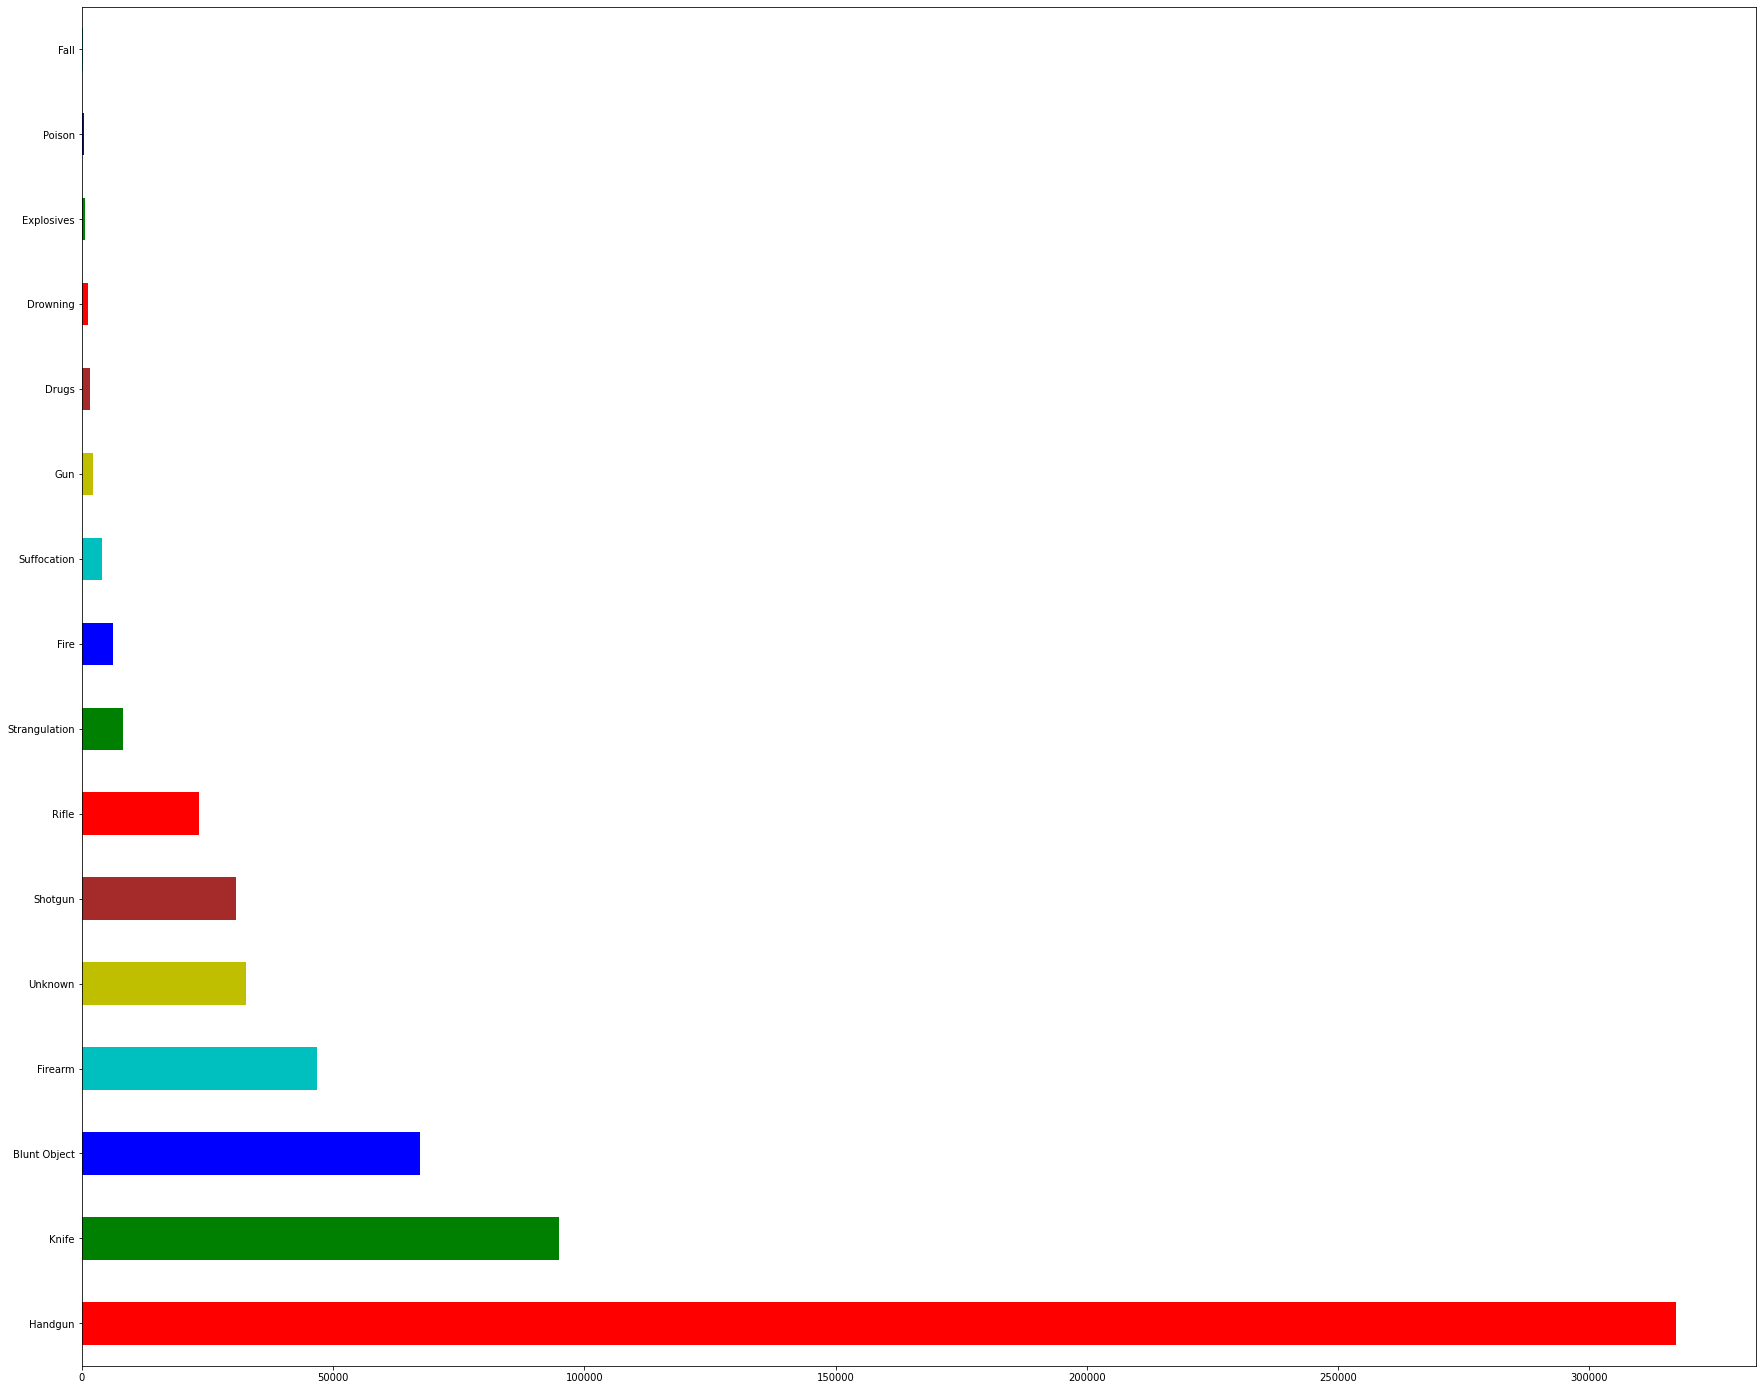

In [101]:
filtro['Weapon'].value_counts().plot(kind='barh',color=['r','g','b','c','y','brown'])

Conforme podemos verificar no gráfico e na relação quantitativa das armas do crime, percebe-se que a maioria dos homícidios foram causados por revólver (handgun).

In [102]:
#Verificando os tipos de relação entre o assassino e a vítima

filtro['Relationship'].value_counts()

Unknown                 272210
Acquaintance            125984
Stranger                 96548
Wife                     23181
Friend                   21935
Girlfriend               16461
Son                       9881
Family                    9528
Husband                   8802
Daughter                  7507
Boyfriend                 7302
Neighbor                  6294
Brother                   5514
Father                    4361
Mother                    4244
In-Law                    3636
Common-Law Wife           2476
Ex-Wife                   1972
Common-Law Husband        1954
Boyfriend/Girlfriend      1383
Stepfather                1360
Sister                    1292
Stepson                   1170
Stepdaughter               753
Ex-Husband                 629
Employer                   509
Employee                   383
Stepmother                 211
Name: Relationship, dtype: int64

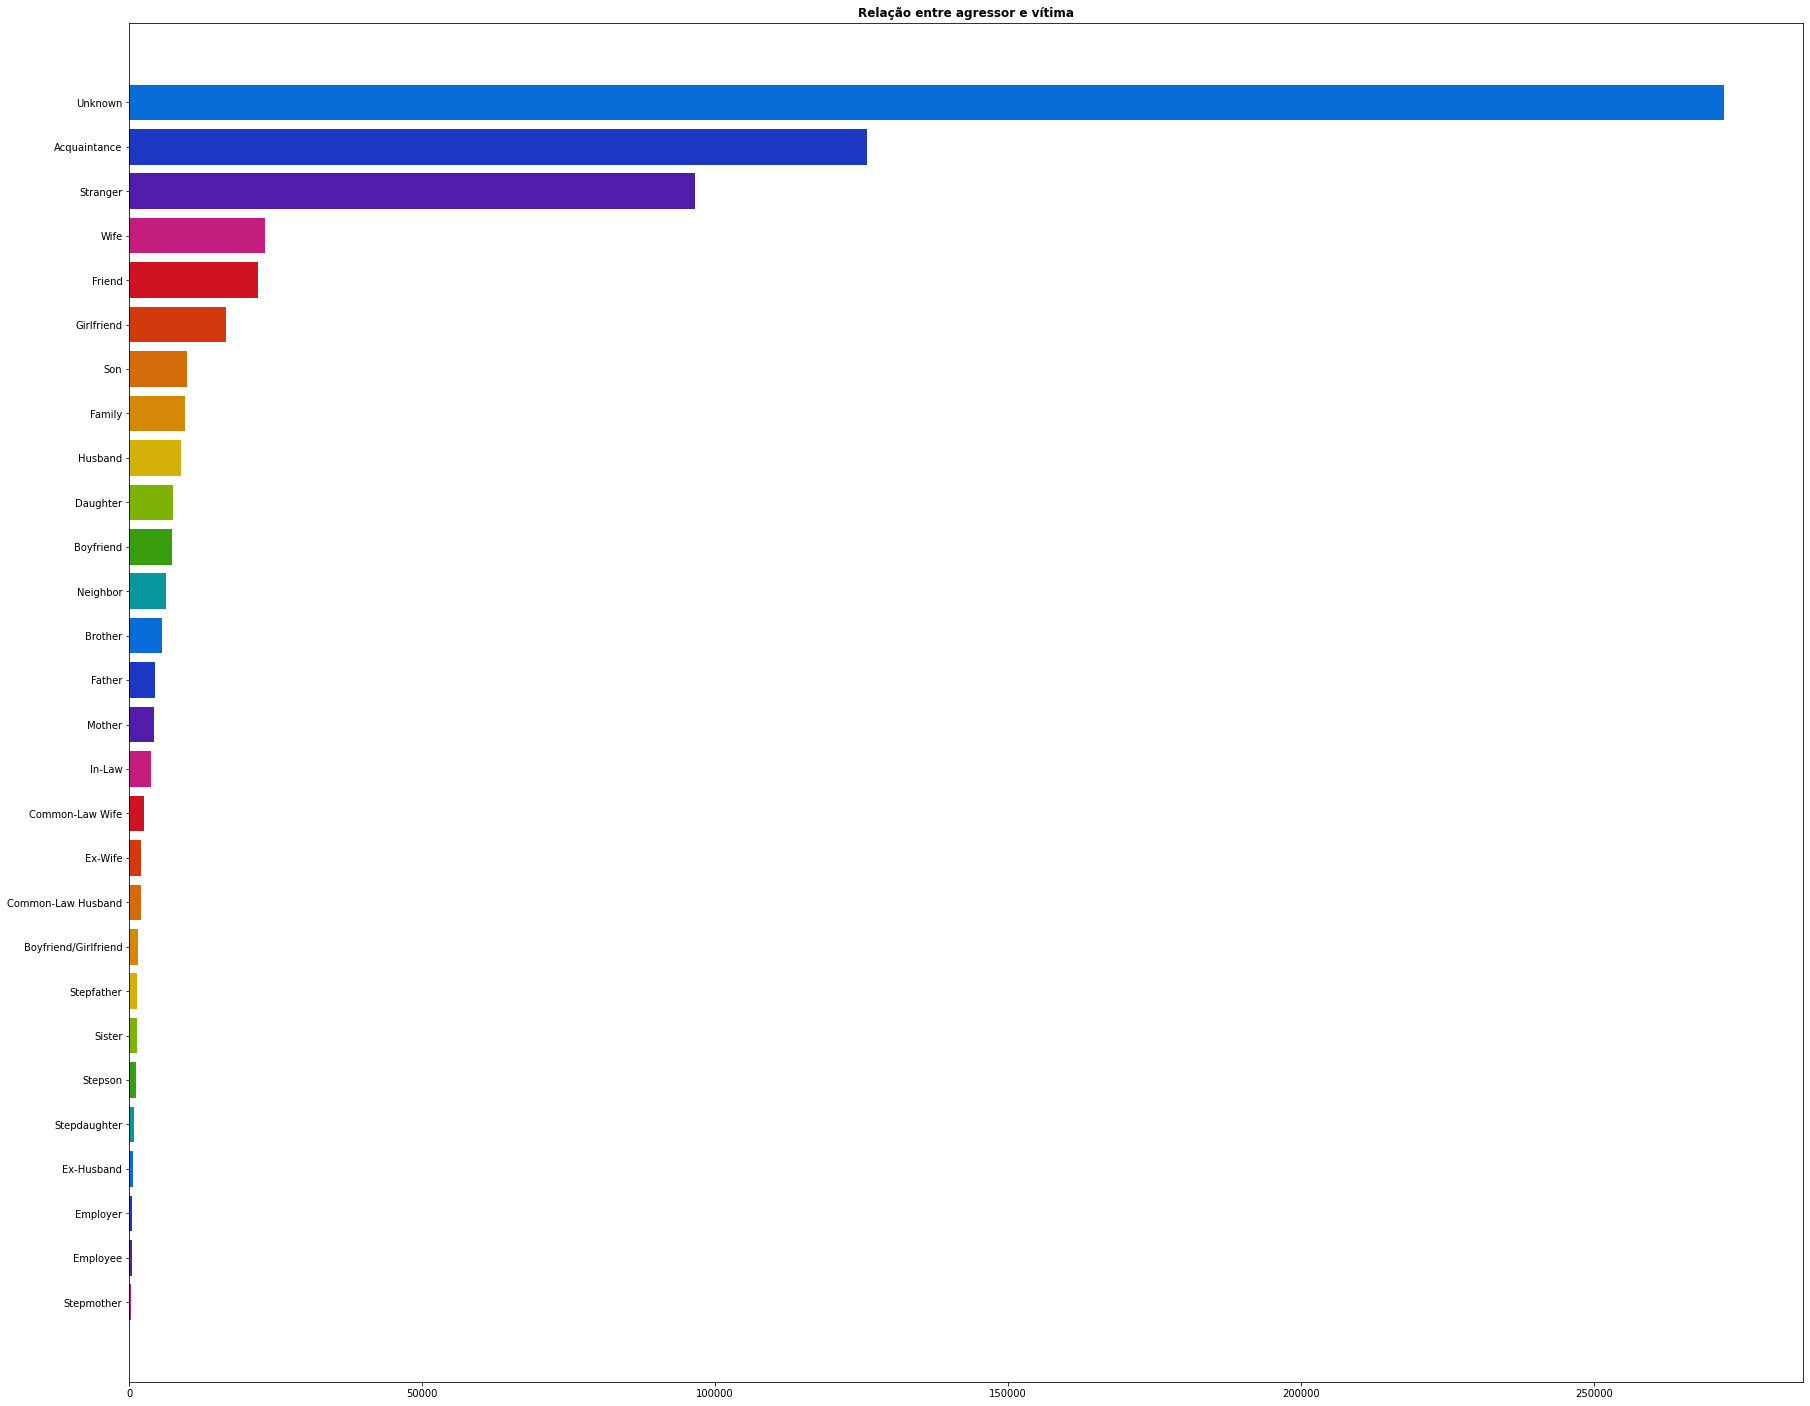

In [103]:
#Verificando a relação entre agressor e vítima - gráfico

colors = ['#cf1322', '#d4380d', '#d46b08', '#d48806', '#d4b106', '#7cb305', '#389e0d', '#08979c', '#096dd9', '#1d39c4', '#531dab', '#c41d7f'][::-1]

relationship = filtro.groupby(['Relationship']).count().sort_values(by=['Record ID'])['Record ID']
plt.barh(relationship.index, relationship.values, color=colors)
plt.title('Relação entre agressor e vítima', fontweight='bold')
plt.rcParams['figure.figsize'] = (30, 25)
plt.show()

Na maior parte dos casos, não se conhece a relação entre a vítima e o assassino. Logo em seguida, temos que os homicídios foram causados por conhecidos da vítima (que não teriam vínculo familiar ou de amizade, apenas alguém que, provavelmente, a vítima teria conhecimento antes de sua morte). Em terceiro lugar, os assassinos são estranhos à vítima.

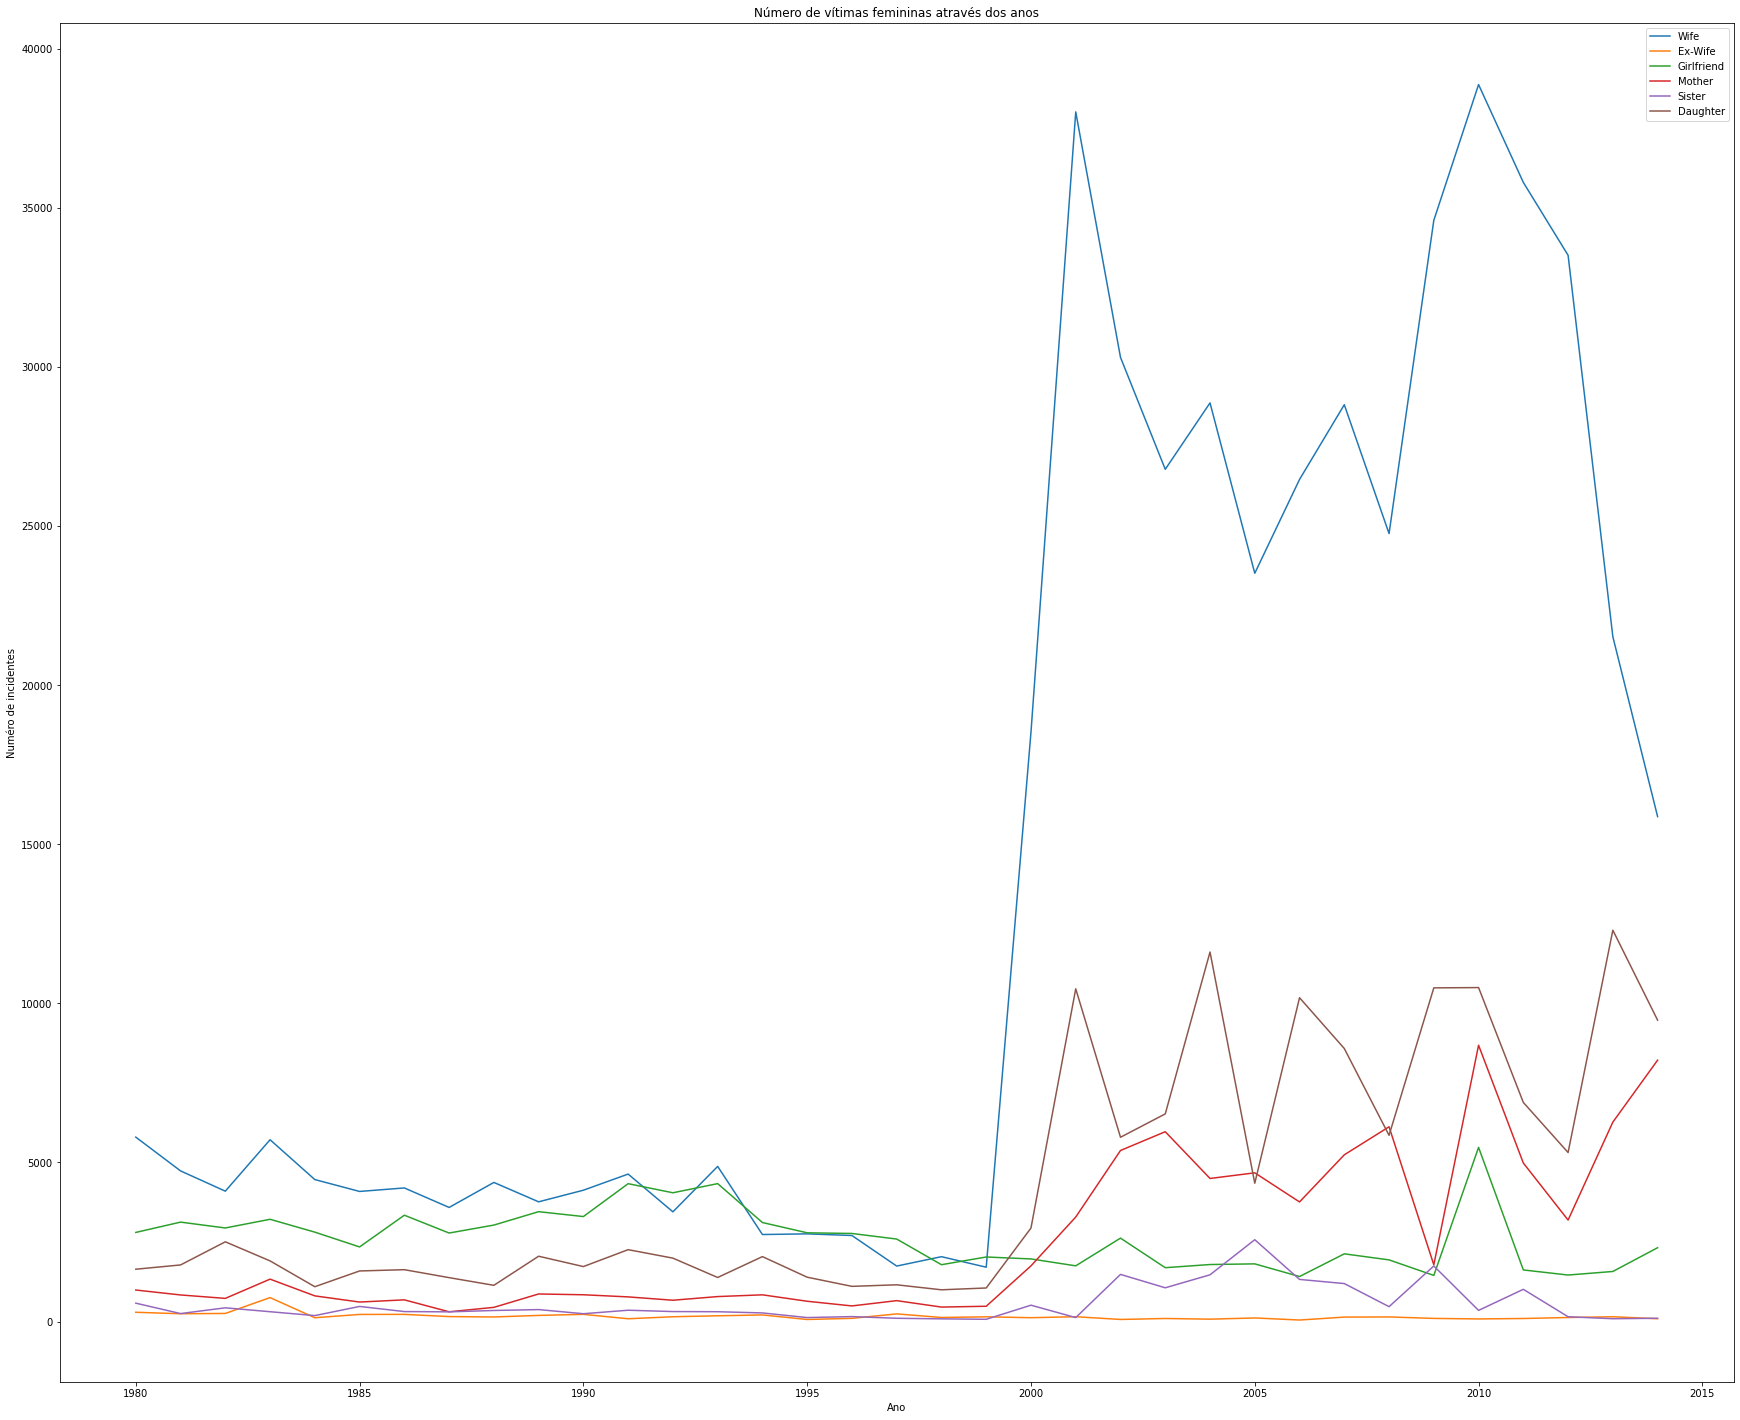

In [104]:
df_s_r_y = filtro.pivot_table(index=["Victim Sex","Relationship","Year"], aggfunc=sum)["Incident"]

def sex_rel(sexo, relacao):
    data = df_s_r_y.loc[sexo, relacao]

    plt.plot(data.index, data.values)
    
relacoes = ["Wife","Ex-Wife","Girlfriend","Mother","Sister","Daughter"]
             
for relacao in relacoes:
    sex_rel("Female", relacao)

plt.title("Número de vítimas femininas através dos anos");
plt.xlabel("Ano");
plt.ylabel("Numéro de incidentes");
plt.legend(relacoes);

Através do gráfico acima, onde verificamos os assassinatos femininos que possuem grau de 'parentesco' com o assassino. Com isso, vemos que grande parte das vítimas são assassinadas pelos namorados ou maridos.


# **Conclusão**

O objetivo era verificar um panorama geral dos assassinatos ocorridos nos Estados Unidos, durante os anos de 1980 a 2014.

Dessa forma, pudemos ver que homens são mais assassinados que as mulheres.

A idade média das vítimas é de 33 anos.

Grande parte dos casos são solucionados, porém, 28,9% ficaram sem solução.

A arma mais utilizada para os homícidios é revólver.

Em geral, a maior parte das pessoas são assassinadas por conhecidos, ou seja, pessoas que já cruzaram o caminho das vítimas em algum momento.

Para mulheres mortas com algum grau de parentesco com o assassino, temos que a maioria é morta pelo namorado ou marido (feminicídio).